# Data Visualization：使用seaborn进行可视化


# Choose types of plot to describe the data
**Trends** - A trend is defined as a pattern of change.
- sns.lineplot - Line charts are best to show trends over a period of time, and multiple lines can be used to show trends in more than one group.

**Relationship** - There are many different chart types that you can use to understand relationships between variables in your data.
- sns.barplot - Bar charts are useful for comparing quantities corresponding to different groups.
- sns.heatmap - Heatmaps can be used to find color-coded patterns in tables of numbers.
- sns.scatterplot - Scatter plots show the relationship between two continuous variables; if color-coded, we can also show the relationship with a third categorical variable.
- sns.regplot - Including a regression line in the scatter plot makes it easier to see any linear relationship between two variables.
- sns.lmplot - This command is useful for drawing multiple regression lines, if the scatter plot contains multiple, color-coded groups.
- sns.swarmplot - Categorical scatter plots show the relationship between a continuous variable and a categorical variable.

**Distribution** - We visualize distributions to show the possible values that we can expect to see in a variable, along with how likely they are.
- sns.histplot - Histograms show the distribution of a single numerical variable.
- sns.kdeplot - KDE plots (or 2D KDE plots) show an estimated, smooth distribution of a single numerical variable (or two numerical variables).
- sns.jointplot - This command is useful for simultaneously displaying a 2D KDE plot with the corresponding KDE plots for each individual variable.

绘制基本格式：plot(x=, y=, data=,)

改变plot风格：`sns.set_style('')`
Seaborn 提供了不同的绘图风格，允许你根据你的喜好和需要来定制图形的外观。通过 sns.set_style，你可以选择不同的风格，例如 "darkgrid"、"whitegrid"、"dark"、"white" 和 "ticks"。

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# 创建一个示例 DataFrame
df = pd.DataFrame({
    'Age': [25, 30, 22, 35, 28, 40, 32, 45, 27, 38],
    'Income': [50000, 60000, 45000, 75000, 60000, 80000, 70000, 90000, 55000, 85000],
    'Gender': ['Male', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'Height': [175, 163, 180, 160, 168, 175, 178, 162,190, 159],
    'City': ['New York', 'Los Angeles', 'Chicago', 'San Francisco', 'Boston', 'Miami', 'Dallas', 'Seattle', 'Denver', 'Atlanta']
})
df.head()

,Age,Income,Gender,Height,City
0,25,50000,Male,175,New York
1,30,60000,Female,163,Los Angeles
2,22,45000,Male,180,Chicago
3,35,75000,Male,160,San Francisco
4,28,60000,Female,168,Boston


## 1. 散点图（scatter plot）
- <big>`scatterplot(x=, y=, data=, hue= )`它通常用于两个数值变量之间的关系，可以直接在数值坐标轴上绘制散点，而不涉及类别数据。
hue：它用于指定一个分类变量，以根据该变量的不同类别对数据进行分组和着色。这通常用于创建具有多个子组的图表，其中每个子组以不同颜色或样式表示。\
注意，plot中如果只传入一个参数data=dataframe，而不指定x和y，则plot会根据所有列进行绘制
- <big>`swarmplot()` 也是绘制散点图，它在类别数据上创建分布散点图，尤其适用于显示分类变量和数值变量之间的关系。每个数据点根据其值被分散开来，以避免重叠。


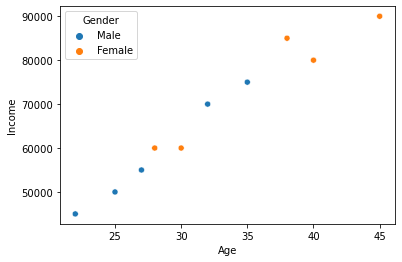

In [12]:
sns.scatterplot(x="Age", y="Income", data=df, hue="Gender")
plt.show()


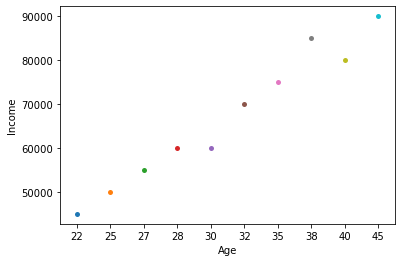

In [11]:
sns.swarmplot(x='Age',y='Income',data=df)
plt.show()

- <big> Use the `lmplot()` to make plot for line-regression model\
    lmplot will plot a scatter with regression line

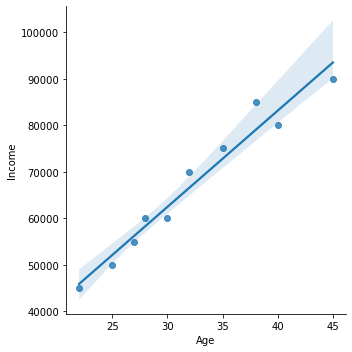

In [10]:
sns.lmplot(x='Age',y='Income',data=df)
plt.show()

# 2. 箱线图（box plot） `boxplot()`

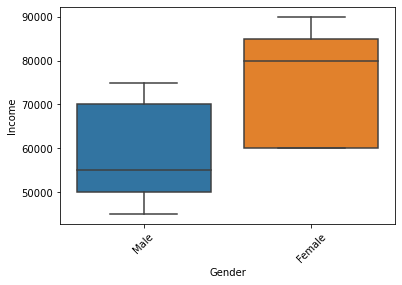

In [31]:
sns.boxplot(x="Gender", y="Income", data=df)
plt.xticks(rotation=45)
plt.show()


# 3. 直方图（Histogram） `histplot()`  
<big>参数 `kde=True` 表示同时显示核密度估计曲线。参数 `bins` 控制直方图的分组数量。你可以根据需要调整 bins 的值来更精确地控制直方图的外观。

<big>`kdeplot(data=, shade=T/F)` 绘制核密度估计图（Kernel Density Estimation，KDE）的函数。核密度估计图用于估计数值数据的概率密度函数，并可视化数据的分布。

<big>`jointplot(x=, y=, data=, kind= 'scatter')`用于绘制双变量关系的函数。它通常用于探索两个数值变量之间的关系，并提供了多种图形选项，包括散点图、核密度估计图和回归拟合线。

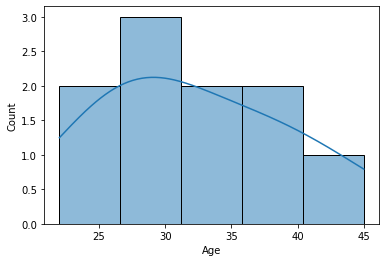

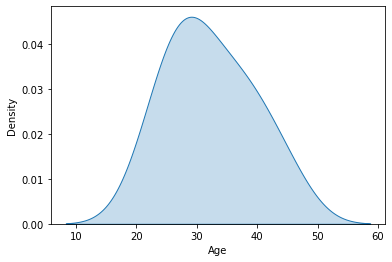

E:\Programming\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


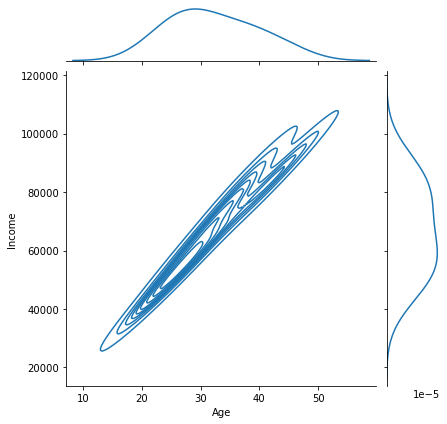

In [19]:
sns.histplot(df["Age"], kde=True, bins=5)
plt.show()

sns.kdeplot(df['Age'],shade=True)
plt.show()

sns.jointplot(df['Age'],df['Income'],kind='kde')
plt.show()

# 4. 折线图（Line chart） `lineplot()`

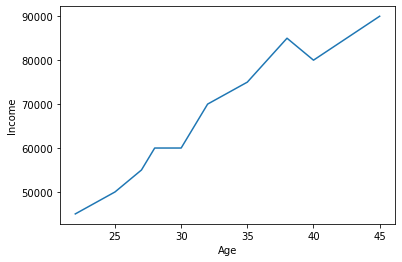

In [28]:
sns.lineplot(x=df.Age,y=df.Income)
plt.show()


# 5. 柱状图（Bar Chart） `barplot()`

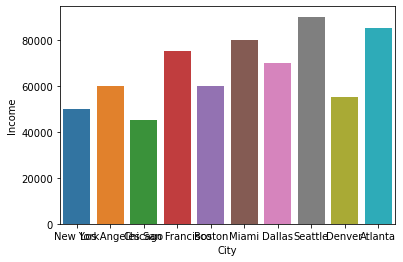

In [36]:
sns.barplot(x='City',y='Income',data=df)
plt.show()

# 6. 热图（Heatmap） `heatmap()`
<big>参数 annot=T/F 表示是否要在每个单元格上添加数值标签，cmap="YlGnBu" 参数指定了颜色映射，以调整颜色。\
    注意，热图一般需要进行相关系数计算，用相关矩阵进行绘制\
    当data均是数值型，可以直接传入heatmap而不用手动计算corMatrix

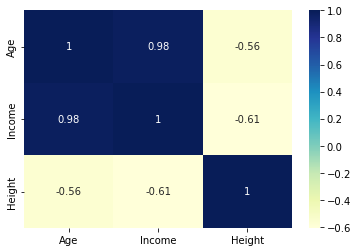

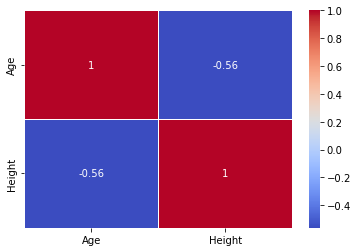

In [59]:
# 计算相关系数矩阵
# 注意，直接对整个dataframe计算corMatrix时候，只会自动得到数值型变量的相关系数
cor_matrix = df.corr()  #仅包括 Age，Height， Income

sns.heatmap(data=cor_matrix,annot=True,cmap='YlGnBu')
plt.show()


# 选择特定列进行绘制
selected_df = df[['Age', 'Height']]

# 计算相关性矩阵
correlation_matrix = selected_df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

